In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import seaborn as sns
import time


In [28]:

sns.set_context("talk")
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# ---- Librerías de red ----
import pandas as pd
import networkx as nx

# ---- Cargar datos ----
nodes = pd.read_csv("Datos alumnos/Trasformados/season7_nodes.csv")
edges = pd.read_csv("Datos alumnos/Trasformados/season7_edges.csv")

G = nx.Graph()
for _, r in nodes.iterrows():
    attrs = r.to_dict()
    node = attrs.pop("node_id")
    G.add_node(node, **attrs)

for _, r in edges.iterrows():
    attrs = r.to_dict()
    u = attrs.pop("source")
    v = attrs.pop("target")
    G.add_edge(u, v, **attrs)

#Métricas básicas
print("Nodos:", G.number_of_nodes())
print("Aristas:", G.number_of_edges())

density = nx.density(G)
print(f"Densidad: {density:.5f}")


Nodos: 2000
Aristas: 259708
Densidad: 0.12992


In [12]:
# Componentes Conexas (Islas)
components = list(nx.connected_components(G))
sizes = sorted([len(c) for c in components], reverse=True)

print(f"Componentes Conexas: {len(components)}")
print(f"Top 3 Islas (tamaño): {sizes[:3]}")
print("La fragmentación valida la regla de 'Temporadas' (invierno no toca verano).")

Componentes Conexas: 11
Top 3 Islas (tamaño): [1553, 404, 23]
La fragmentación valida la regla de 'Temporadas' (invierno no toca verano).


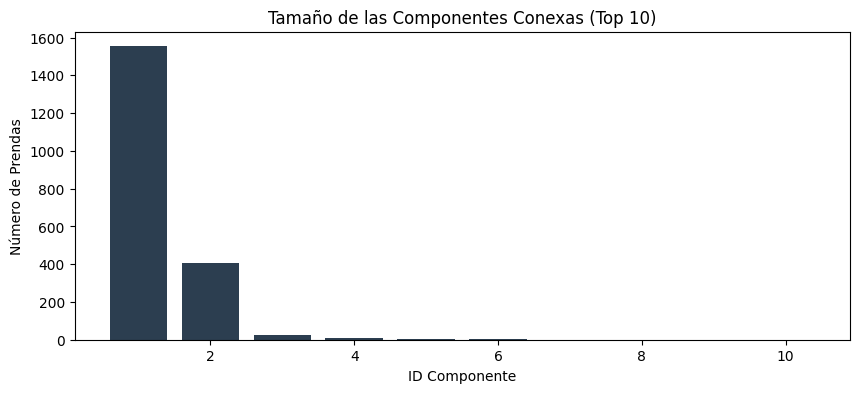

In [13]:
plt.figure(figsize=(10, 4))
plt.bar(range(1, len(sizes[:10]) + 1), sizes[:10], color='#2c3e50')
plt.title("Tamaño de las Componentes Conexas (Top 10)")
plt.xlabel("ID Componente")
plt.ylabel("Número de Prendas")
plt.show()

In [15]:
# Asortatividad nvl
try:
    assort_nivel = nx.attribute_assortativity_coefficient(G, "nivel")
    print(f"Asortatividad Nivel: {assort_nivel:.4f}")
    print("Valo negativo --> heterofilia (las prendas buscan niveles distintos).")
except:
    print("Error calculando asortatividad de nivel.")

# Asortatividad Season 
try:
    assort_season = nx.attribute_assortativity_coefficient(G, "season_code")
    print(f"Asortatividad Season: {assort_season:.4f}")
    print("X --> Valor cercano a 1.0 confirma que las prendas solo conectan con su misma temporada.")
except:
    pass

Asortatividad Nivel: -0.2157
Valo negativo --> heterofilia (las prendas buscan niveles distintos).
Asortatividad Season: nan
X --> Valor cercano a 1.0 confirma que las prendas solo conectan con su misma temporada.


c:\Users\marke\.conda\envs\Data_Science_III\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:282: RuntimeWarning: invalid value encountered in scalar divide
  r = (t - s) / (1 - s)


In [16]:
# Grado Promedio y Distribución
degrees = [d for n, d in G.degree()]
avg_degree = sum(degrees) / len(degrees)
print(f"Grado Promedio: {avg_degree:.2f}")
print("EL Número promedio de combinaciones que ofrece cada prenda.")

Grado Promedio: 259.71
EL Número promedio de combinaciones que ofrece cada prenda.


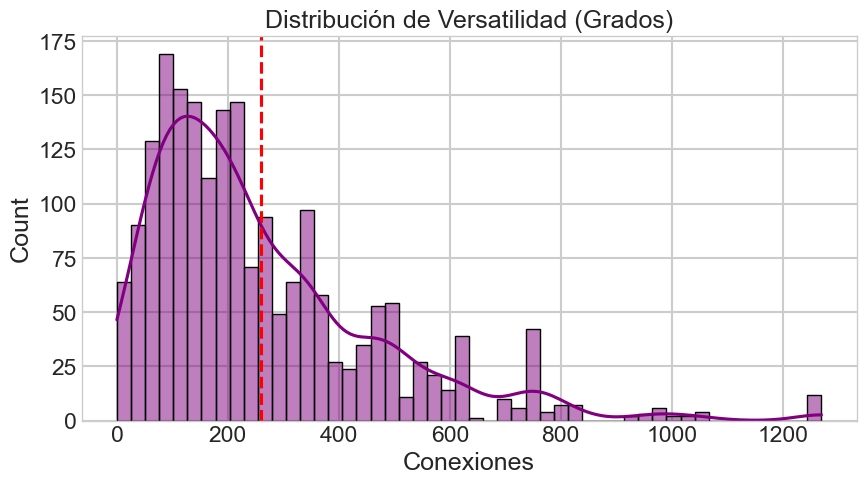

In [17]:
# Gráfica: Distribución de Grados
plt.figure(figsize=(10, 5))
sns.histplot(degrees, bins=50, kde=True, color="purple")
plt.axvline(avg_degree, color='r', linestyle='--', label=f'Promedio: {avg_degree:.1f}')
plt.title("Distribución de Versatilidad (Grados)")
plt.xlabel("Conexiones")
plt.show()

In [18]:
# K-Core (Núcleo)
core_numbers = nx.core_number(G)
max_k = max(core_numbers.values())
k_core_nodes = [n for n, k in core_numbers.items() if k == max_k]

print(f"Max K-Core: {max_k}")
print(f"Tamaño del Núcleo Duro: {len(k_core_nodes)} prendas")
print("Se identifica los 'Key Items' necesarioa para no romper el stock.")

Max K-Core: 224
Tamaño del Núcleo Duro: 500 prendas
Se identifica los 'Key Items' necesarioa para no romper el stock.


In [19]:
# Clustering (Triángulos)
global_clustering = nx.transitivity(G)
print(f"Transitivity (Clustering Global): {global_clustering:.4f}")
print("prob de cierre triang. (facilidad para crear looks de 3 piezas).")

Transitivity (Clustering Global): 0.2637
prob de cierre triang. (facilidad para crear looks de 3 piezas).


In [22]:
communities = list(community.greedy_modularity_communities(G))
print(f"Comunidades detectadas: {len(communities)}")

Comunidades detectadas: 12


In [ ]:
largest_c = list(communities[0])
styles = [G.nodes[n]['style'] for n in largest_c]
top_style = Counter(styles).most_common(1)[0]
print(f"estilo dominante en comunidad principal: {top_style[0]}")
print("grafo agrupa prendas por coherencia estética.")

In [24]:
avg_clus = nx.average_clustering(G)
print(f"Clustering Promedio Local: {avg_clus:.4f}")




Clustering Promedio Local: 0.3225


In [25]:
# Calculamos el número de núcleo (core number) para cada nodo
core_numbers = nx.core_number(G)
max_k = max(core_numbers.values())

print(f"1. K-Core Máximo (Profundidad del grafo): {max_k}")
print(f"   (Significa que existe un grupo de prendas donde cada una conecta con al menos otras {max_k} dentro del grupo)")

1. K-Core Máximo (Profundidad del grafo): 224
   (Significa que existe un grupo de prendas donde cada una conecta con al menos otras 224 dentro del grupo)


In [26]:
import networkx as nx
from networkx.algorithms import community


# 1. Macro
print(f"DENSIDAD: {nx.density(G):.5f}")
comps = list(nx.connected_components(G))
print(f"N_COMPONENTES: {len(comps)}")
print(f"TAMAÑO_ISLAS_TOP3: {[len(c) for c in comps[:3]]}")

# 2. Lógica
try:
    assort = nx.attribute_assortativity_coefficient(G, "nivel")
    print(f"ASORTATIVIDAD_NIVEL: {assort:.4f}")
except:
    print("ASORTATIVIDAD_NIVEL: Error (revisar atributo 'nivel')")

# 3. Clustering
try:
    # Usamos transitividad para ahorrar tiempo si el grafo es grande
    clus = nx.transitivity(G) 
    print(f"TRANSITIVIDAD (Clustering Global): {clus:.4f}")
except:
    print("CLUSTERING: Error de cálculo")

# 4. Comunidades
try:
    coms = list(community.greedy_modularity_communities(G))
    print(f"NUM_COMUNIDADES: {len(coms)}")
except:
    print("COMUNIDADES: Error (librería o tiempo)")

# 5. Core
k_core = nx.core_number(G)
print(f"MAX_K_CORE: {max(k_core.values())}")

DENSIDAD: 0.12992
N_COMPONENTES: 11
TAMAÑO_ISLAS_TOP3: [1553, 404, 3]
ASORTATIVIDAD_NIVEL: -0.2157
TRANSITIVIDAD (Clustering Global): 0.2637
NUM_COMUNIDADES: 12
MAX_K_CORE: 224


## Generamos los Looks

Se crea el preproceso basico de limpieza por seguridad y se crea el modelo para generar los looks. Busca triangulos

In [31]:

# CONFIGURACIÓN 
TARGET_LOOKS = 200       
PENALTY_FACTOR = 0.5      
MIN_SCORE_THRESHOLD = 15  

print(f"Iniciando generación masiva de {TARGET_LOOKS} Looks")
start_time = time.time()

# 1. PREPARAR GRAFO

SEASON = 7  
nodes_season = [n for n, data in G.nodes(data=True) if data.get("season_code") == SEASON]
G_working = G.subgraph(nodes_season).copy()
edges_to_remove = [
    (u, v) for u, v, d in G_working.edges(data=True)
    if d.get('weight_color', 1) < 2
]
G_working.remove_edges_from(edges_to_remove)
G_working.remove_nodes_from(list(nx.isolates(G_working)))

# 2. FUNCIÓN OPTIMIZADA
def get_best_look_mass(grafo, penalty):
    best_look = None
    best_score = -1
    sorted_edges = sorted(
        grafo.edges(data=True), 
        key=lambda x: x[2].get('weight_color', 0), 
        reverse=True
    )[:5000]

    for u, v, data in sorted_edges:
        if data.get('weight_color', 0) * 3 < MIN_SCORE_THRESHOLD:
            break
            
        common = list(nx.common_neighbors(grafo, u, v))
        for w in common:
            lvl = [grafo.nodes[n].get('nivel', 0) for n in [u, v, w]]

            if 1 in lvl and len(set(lvl)) > 1: 
                
                s = (data.get('weight_color', 1) + 
                     grafo[u][w].get('weight_color', 1) + 
                     grafo[v][w].get('weight_color', 1))
                
                if s > best_score:
                    best_score = s
                    best_look = [u, v, w]
                    if best_score > 25: break 
        if best_look and best_score > 25: break
    if best_look:
        for n in best_look:
            for neighbor in grafo.neighbors(n):
                grafo[n][neighbor]['weight_color'] *= penalty
                
    return best_look, best_score

# 3. BUCLE MASIVO Y EXTRACCIÓN DE DATOS
final_looks_data = []

for i in range(TARGET_LOOKS):
    nodos, score = get_best_look_mass(G_working, PENALTY_FACTOR)
    
    if not nodos:
        print(f"Grafo agotado en el look {i}. No hay más combinaciones válidas.")
        break
    if score < MIN_SCORE_THRESHOLD:
        print(f"Calidad mínima alcanzada en el look {i} (Score {score:.2f}). Parando.")
        break
    
    items_data = []
    for n in nodos:
        node_data = G.nodes[n] 
        items_data.append({
            'name': node_data.get('product_name', 'Unknown'), 
            'color': node_data.get('color_name', 'N/A'),      
            'lvl': node_data.get('nivel', 0)                  
        })
    
    # Ordenamos las 3 prendas por Nivel (de menor a mayor) para mantener orden en columnas
    items_data.sort(key=lambda x: x['lvl'])
    
    row = {
        'Ranking': i + 1,
        'Score': round(score, 2),
        
        # Prenda 1 (Nivel más bajo, ej. Pantalón)
        'P1_Nombre': items_data[0]['name'],
        'P1_Color': items_data[0]['color'],
        'P1_Nivel': items_data[0]['lvl'],
        
        # Prenda 2 (Nivel medio)
        'P2_Nombre': items_data[1]['name'],
        'P2_Color': items_data[1]['color'],
        'P2_Nivel': items_data[1]['lvl'],
        
        # Prenda 3 (Nivel más alto, ej. Chaqueta)
        'P3_Nombre': items_data[2]['name'],
        'P3_Color': items_data[2]['color'],
        'P3_Nivel': items_data[2]['lvl'],
    }
    
    final_looks_data.append(row)
    
    if (i+1) % 50 == 0:
        elapsed = time.time() - start_time
        print(f"   ... {i+1} looks generados. Score actual: {score:.2f}")

total_time = time.time() - start_time
print(f"\n Proceso finalizado en {total_time:.1f} segundos.")
print(f"   Total looks generados: {len(final_looks_data)}")

df_mass = pd.DataFrame(final_looks_data)
df_mass.to_csv("looks_generados.csv", index=False) #to csv


# Orden visual de columnas
column_order = [
    'Ranking', 'Score', 
    'P1_Nombre', 'P1_Color', 'P1_Nivel',
    'P2_Nombre', 'P2_Color', 'P2_Nivel',
    'P3_Nombre', 'P3_Color', 'P3_Nivel'
]
cols_final = [c for c in column_order if c in df_mass.columns]
df_mass = df_mass[cols_final]

display(df_mass.head(15))
display(df_mass.tail(15))

Iniciando generación masiva de 200 Looks
   ... 50 looks generados. Score actual: 24.00
   ... 100 looks generados. Score actual: 23.00
   ... 150 looks generados. Score actual: 22.00
   ... 200 looks generados. Score actual: 20.00

 Proceso finalizado en 306.0 segundos.
   Total looks generados: 200


,Ranking,Score,P1_Nombre,P1_Color,P1_Nivel,P2_Nombre,P2_Color,P2_Nivel,P3_Nombre,P3_Color,P3_Nivel
0,1,25,Abelone Playsuit miniprint,black,1,Alba Top dots,white,2,Indie Bag anhka,camel,3
1,2,25,Vilukki Shorts south,camel,1,Ally Shirt bright,white,2,Acacia Jacket ward,black,3
2,3,25,Ahina Pant floral,black,1,Anna T-shirt oneck,white,2,Pcbianca Bag cross,camel,3
3,4,25,Tiel Pant paris,camel,1,Akoz Shirt venus,black,2,Collection Shirt chi,white,2
4,5,25,Bsfiona Jeans nova,black,1,Akuline Tshirt white,white,2,Lisa Shirt romb,camel,2
5,6,25,Alexa Jeans cropped,white,1,Alice Shirt off,black,2,Alba Top dots,camel,2
6,7,25,Alexandra Short stripe,white,1,Anna T-shirt oneck,black,2,Pretty Top season,camel,2
7,8,25,Arla Pant short,black,1,Athenus Top versus,white,2,Dream Top film,camel,2
8,9,25,Olive Pant bubble,camel,1,Aster Top blue,black,2,Darlim Top cerise,white,2
9,10,25,Carjones Jeans skinny,black,1,Bowie Tshirt cat,white,2,Lulu Cardigan long,camel,2


,Ranking,Score,P1_Nombre,P1_Color,P1_Nivel,P2_Nombre,P2_Color,P2_Nivel,P3_Nombre,P3_Color,P3_Nivel
185,186,20,Summ Skirt onado,coral,1,Akoz Shirt venus,green_light,2,Cahier Foulard minerva,khaki,3
186,187,20,Alexa Jeans slim,green_light,1,Aure Sweater ward,khaki,2,Vmcallie Jacket bomber,black,3
187,188,20,Anc Pant silver,beige,1,Casacche Top wide,khaki,2,Majolica Jacket bomber,black,3
188,189,20,Rizetta Dress sleeveless,black,1,Dina Sweater knit,grey,2,Anja Jacket suede,mustand,3
189,190,20,Anna Jeans style,khaki,1,Chic Tshirt beach,green_light,2,Senes Sweater rainbow,coral,2
190,191,20,Dora Pant film,black,1,Anna T-shirt oneck,gray_light,2,Bari Parka silver,khaki,3
191,192,20,Dusta Skirt doll,black,1,Ara Sweater season,gray_light,2,Shiner Tshirt peak,khaki,2
192,193,20,Arla Pant short,khaki,1,Nala Cardigan nais,green_light,2,Nanoki Tshirt coral,coral,2
193,194,20,Cerise Jumpsuit solid,khaki,1,Aster Top blue,salmon,2,Taily Tshirt knot,black,2
194,195,20,Olive Pant alabama,black,1,Aure Sweater ward,mustand,2,Ihma Sweater nice,grey,2


In [32]:
cols_final = [c for c in column_order if c in df_mass.columns]
df_mass = df_mass[cols_final]

print("\nTOP 5 MEJORES LOOKS")
display(df_mass.head(5))

print("\n ÚLTIMOS 5 LOOKS (Peor Score aceptado)")
display(df_mass.tail(5))


TOP 5 MEJORES LOOKS


,Ranking,Score,P1_Nombre,P1_Color,P1_Nivel,P2_Nombre,P2_Color,P2_Nivel,P3_Nombre,P3_Color,P3_Nivel
0,1,25,Abelone Playsuit miniprint,black,1,Alba Top dots,white,2,Indie Bag anhka,camel,3
1,2,25,Vilukki Shorts south,camel,1,Ally Shirt bright,white,2,Acacia Jacket ward,black,3
2,3,25,Ahina Pant floral,black,1,Anna T-shirt oneck,white,2,Pcbianca Bag cross,camel,3
3,4,25,Tiel Pant paris,camel,1,Akoz Shirt venus,black,2,Collection Shirt chi,white,2
4,5,25,Bsfiona Jeans nova,black,1,Akuline Tshirt white,white,2,Lisa Shirt romb,camel,2



 ÚLTIMOS 5 LOOKS (Peor Score aceptado)


,Ranking,Score,P1_Nombre,P1_Color,P1_Nivel,P2_Nombre,P2_Color,P2_Nivel,P3_Nombre,P3_Color,P3_Nivel
195,196,20,Vicom Jeans noos,black,1,Ball Jacket bomber,khaki,3,Caravana Jacket biker,green_light,3
196,197,20,Eleni Pant sew,black,1,Bari Parka silver,beige,3,Bastian Jacket bohck,khaki,3
197,198,20,Georgia Jeans crop,khaki,1,Buttons Top summ,beige,2,Mandala Jacket bomb,black,3
198,199,20,Saturne Pant grace,salmon,1,Cammi Jacket oliv,khaki,3,Laura Jacket jo,black,3
199,200,20,Camou Skirt onado,khaki,1,Coco Tshirt tank,green_light,2,Summa Jacket colors,coral,3
